In [56]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 

In [3]:
data = pd.read_csv('data_cleaned.csv')

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [7]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

seggrigating Variable dependent or independent

In [10]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']
x.shape , y.shape

((891, 24), (891,))

### scaling data

In [17]:
from sklearn.preprocessing import StandardScaler  
scaled = StandardScaler()
x = scaled.fit_transform(x)





In [15]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y , random_state =96 , stratify =y)

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [31]:
clf = KNN(n_neighbors=3)

clf.fit(train_x,train_y)
# predicting over train set and over calculating the f1 score
train_pridict = clf.predict(train_x)
k = f1_score(train_pridict,train_y)
print("Training F1 score = ",k)


# pridiction over the test data and a calculating the value of k
test_pridict = clf.predict(test_x)
k = f1_score(test_pridict,test_y)
print("Tst F1 score = ",k)


Training F1 score =  0.8225806451612903
Tst F1 score =  0.7080745341614907


### Checking the Traning value of k and the train Curve

In [52]:
def F1score(k):
    train_f1 = []
    test_f1 = []
    for i in k:
        clf = KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        tem = clf.predict(train_x)
        tem = f1_score(tem,train_y)
        train_f1.append(tem)


        tem = clf.predict(test_x)
        tem = f1_score(tem,test_y)
        test_f1.append(tem)

    return train_f1 , test_f1
        


### defining the value of k

In [60]:
k = range(1,150)

### Calling above define function

In [53]:
train_f1,test_f1 = F1score(k)

In [59]:
score = pd.DataFrame({'Train_score': train_f1 ,'Test_score': test_f1 },index=k)
score

,Train_score,Test_score
1,0.984436,0.701149
2,0.806527,0.595745
3,0.822581,0.708075
4,0.771300,0.628571
5,0.774327,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


### Visulazing

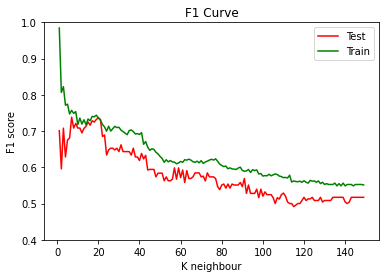

In [65]:
plt.plot(k, test_f1,label = "Test",color = 'red')
plt.plot(k, train_f1,label = 'Train',color = 'green')
plt.xlabel('K neighbour')
plt.ylabel('F1 score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend();